nodes:  1000 links  2974


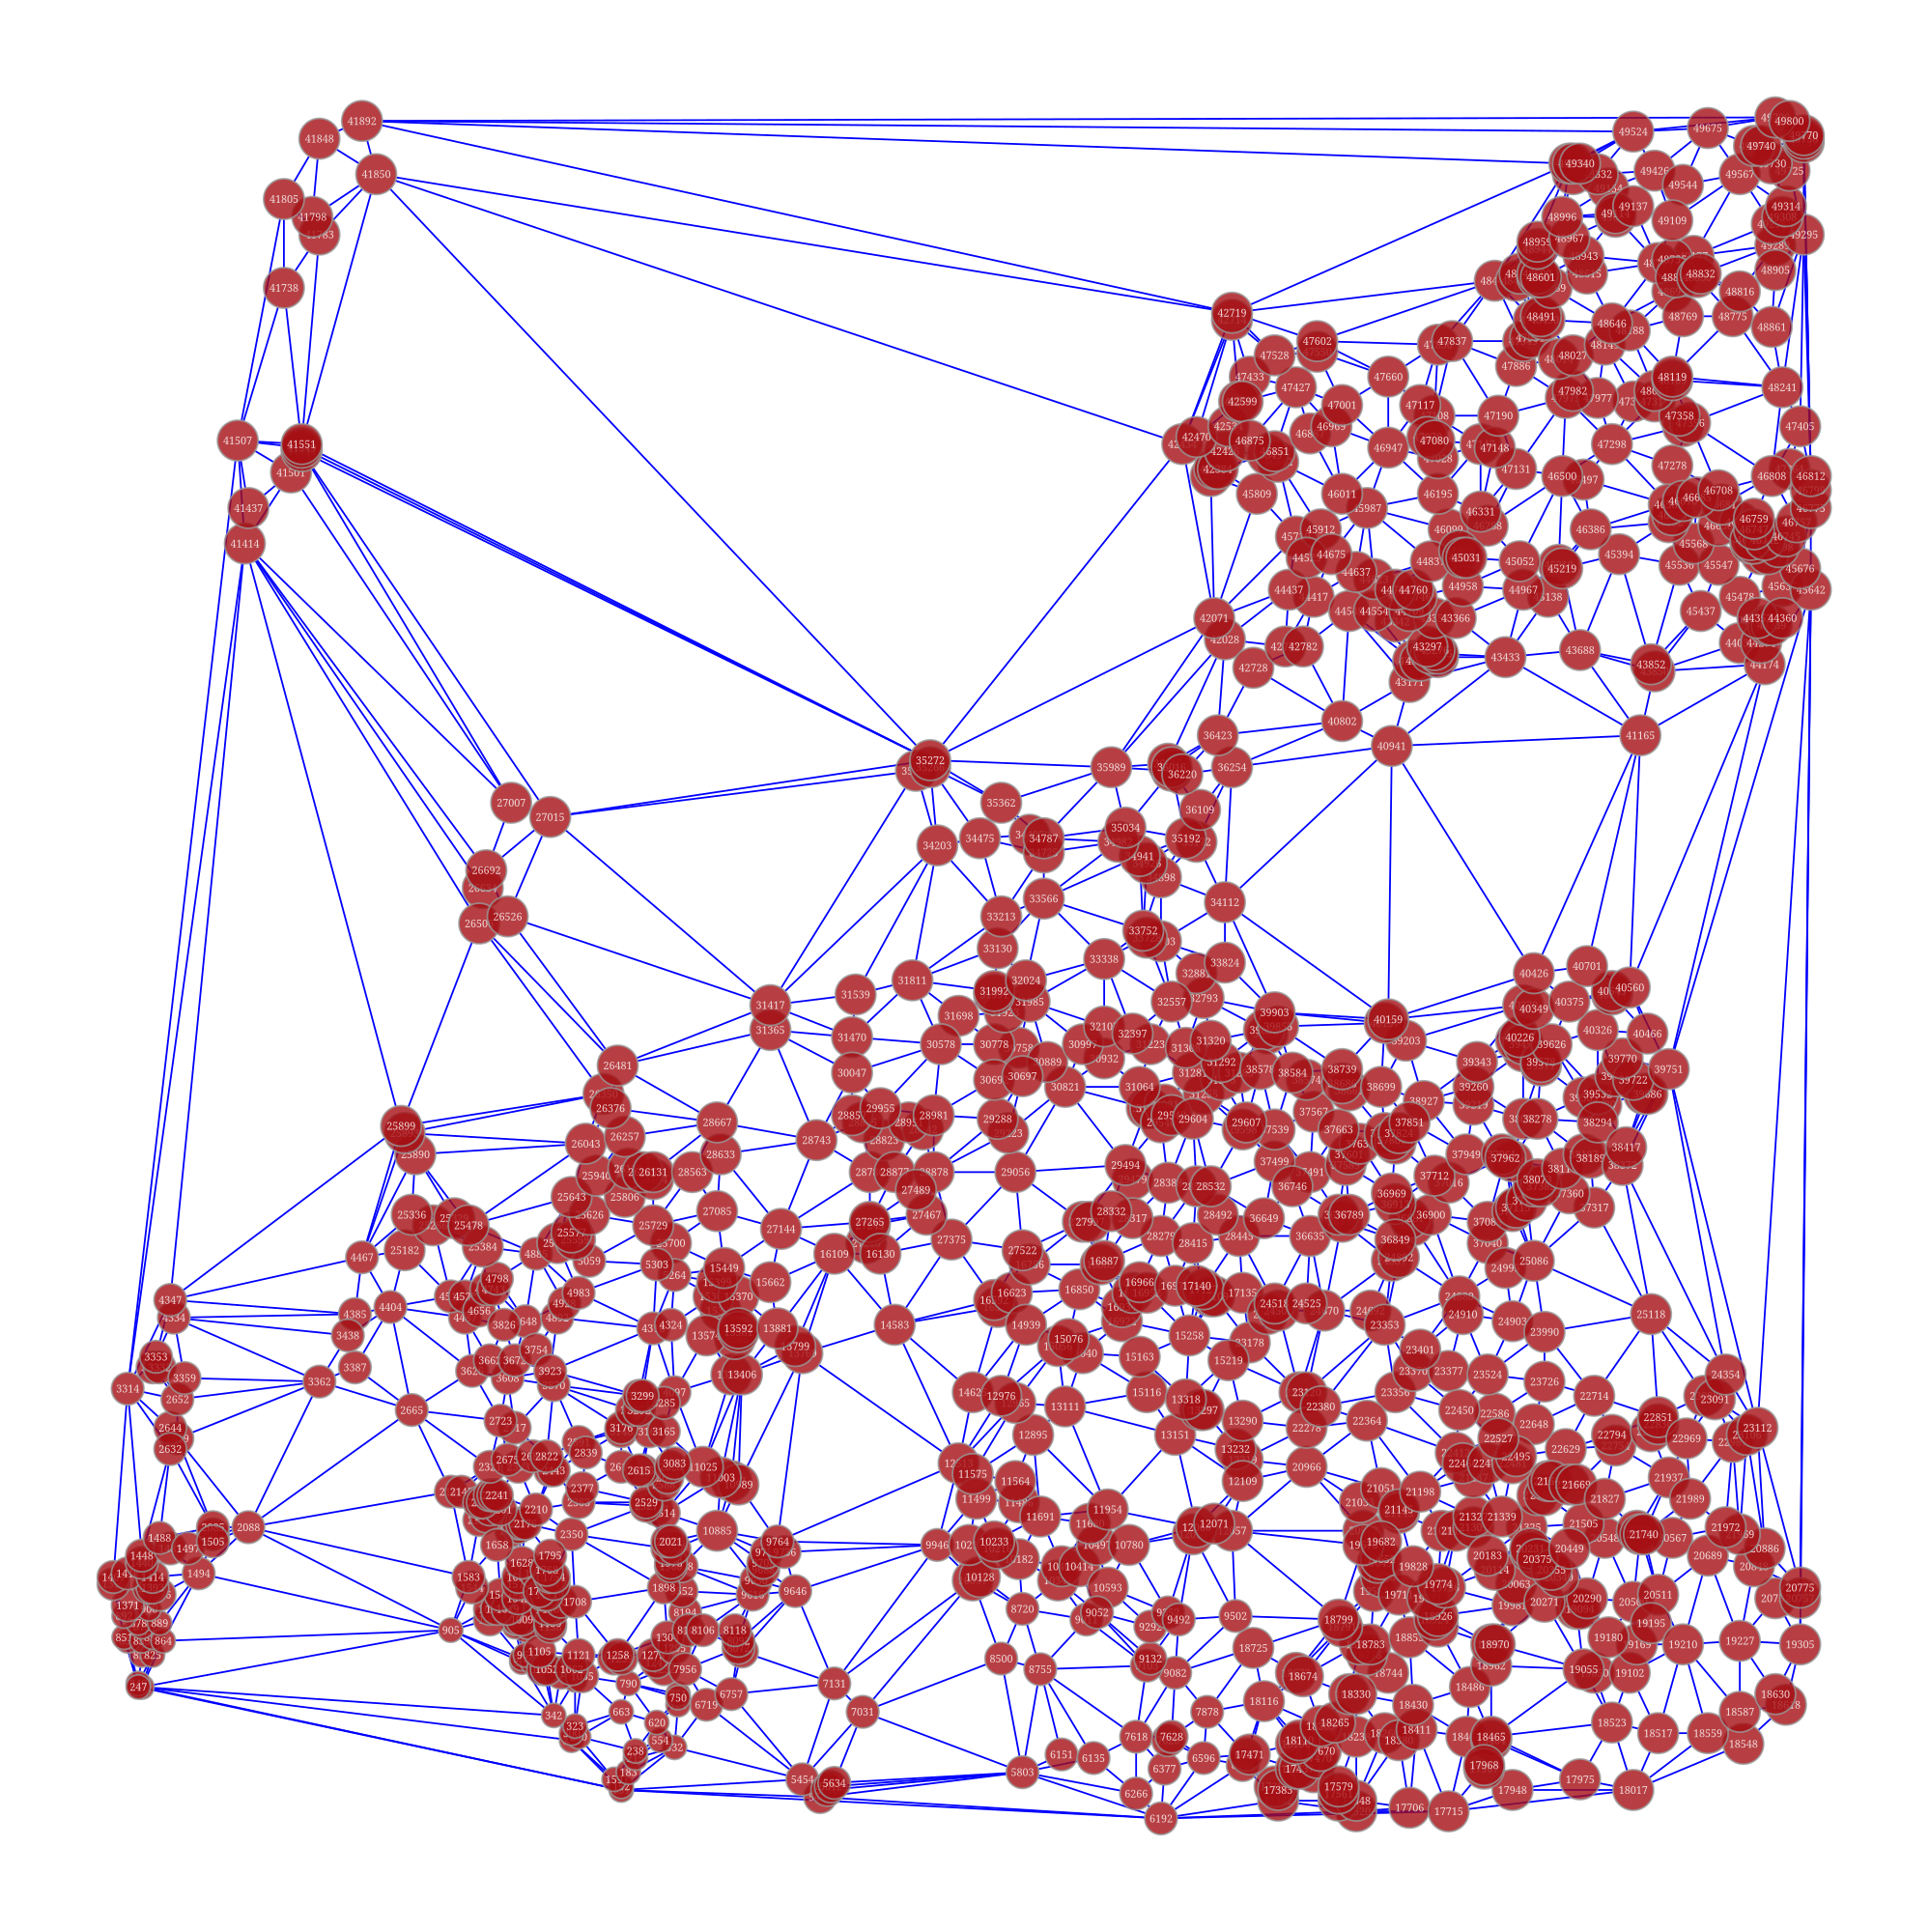

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x788e91358e30, at 0x788f124276b0>

In [1]:
# Pure point graph
from graph_tool import draw
import python_codes.files_operators

types = 'dt'
city = 'fukuoka'
sort = 'ascend'
scale = '1000'
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{city}_{sort}_{scale}_{types}.net", True)
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())

draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000), output=f'./output/{city}_{sort}_{scale}_{types}.pdf')

nodes:  37 links  46


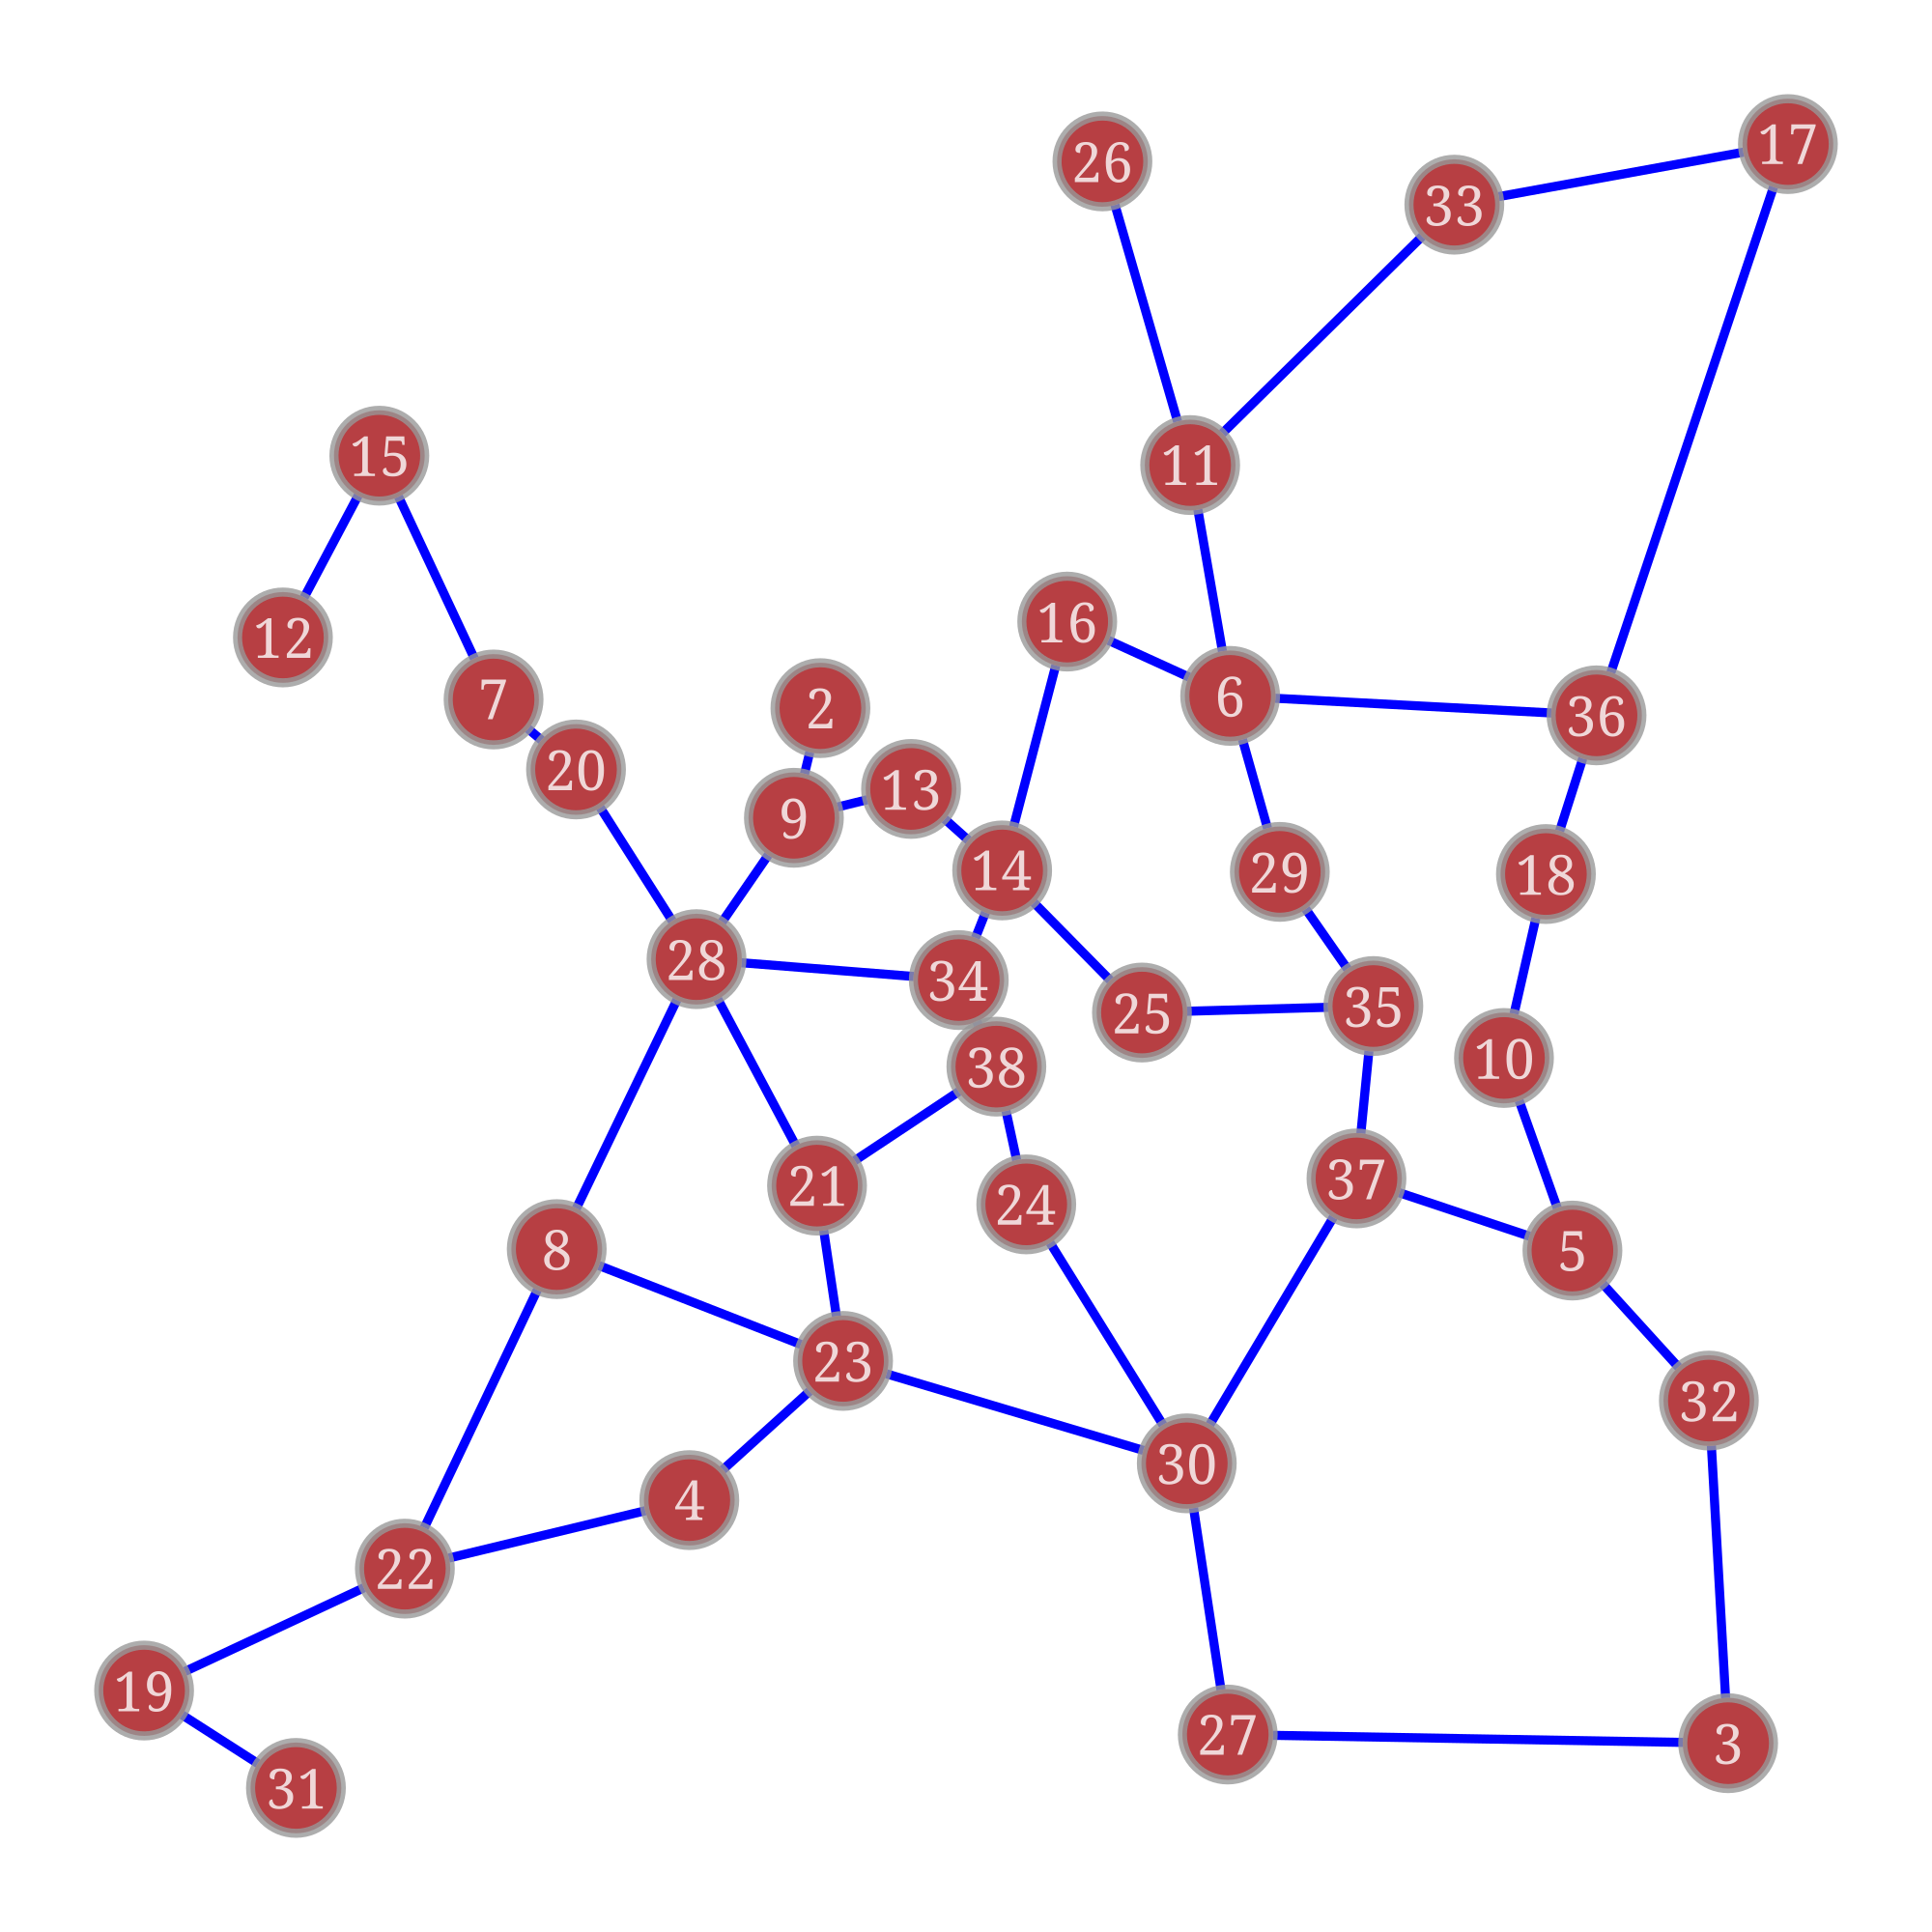

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7d523b9490, at 0x7f7d597cb620>

In [27]:
# Pure point graph
from graph_tool import draw
import python_codes.files_operators

types = 'dt'
city = 'cost'
sort = 'ascend'
scale = '37'
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{city}_{sort}_{scale}_{types}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())
#read_graph.clear_edges()
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000), output=f'./output/{city}_{sort}_{scale}_{types}.pdf')

nodes:  50 links  69


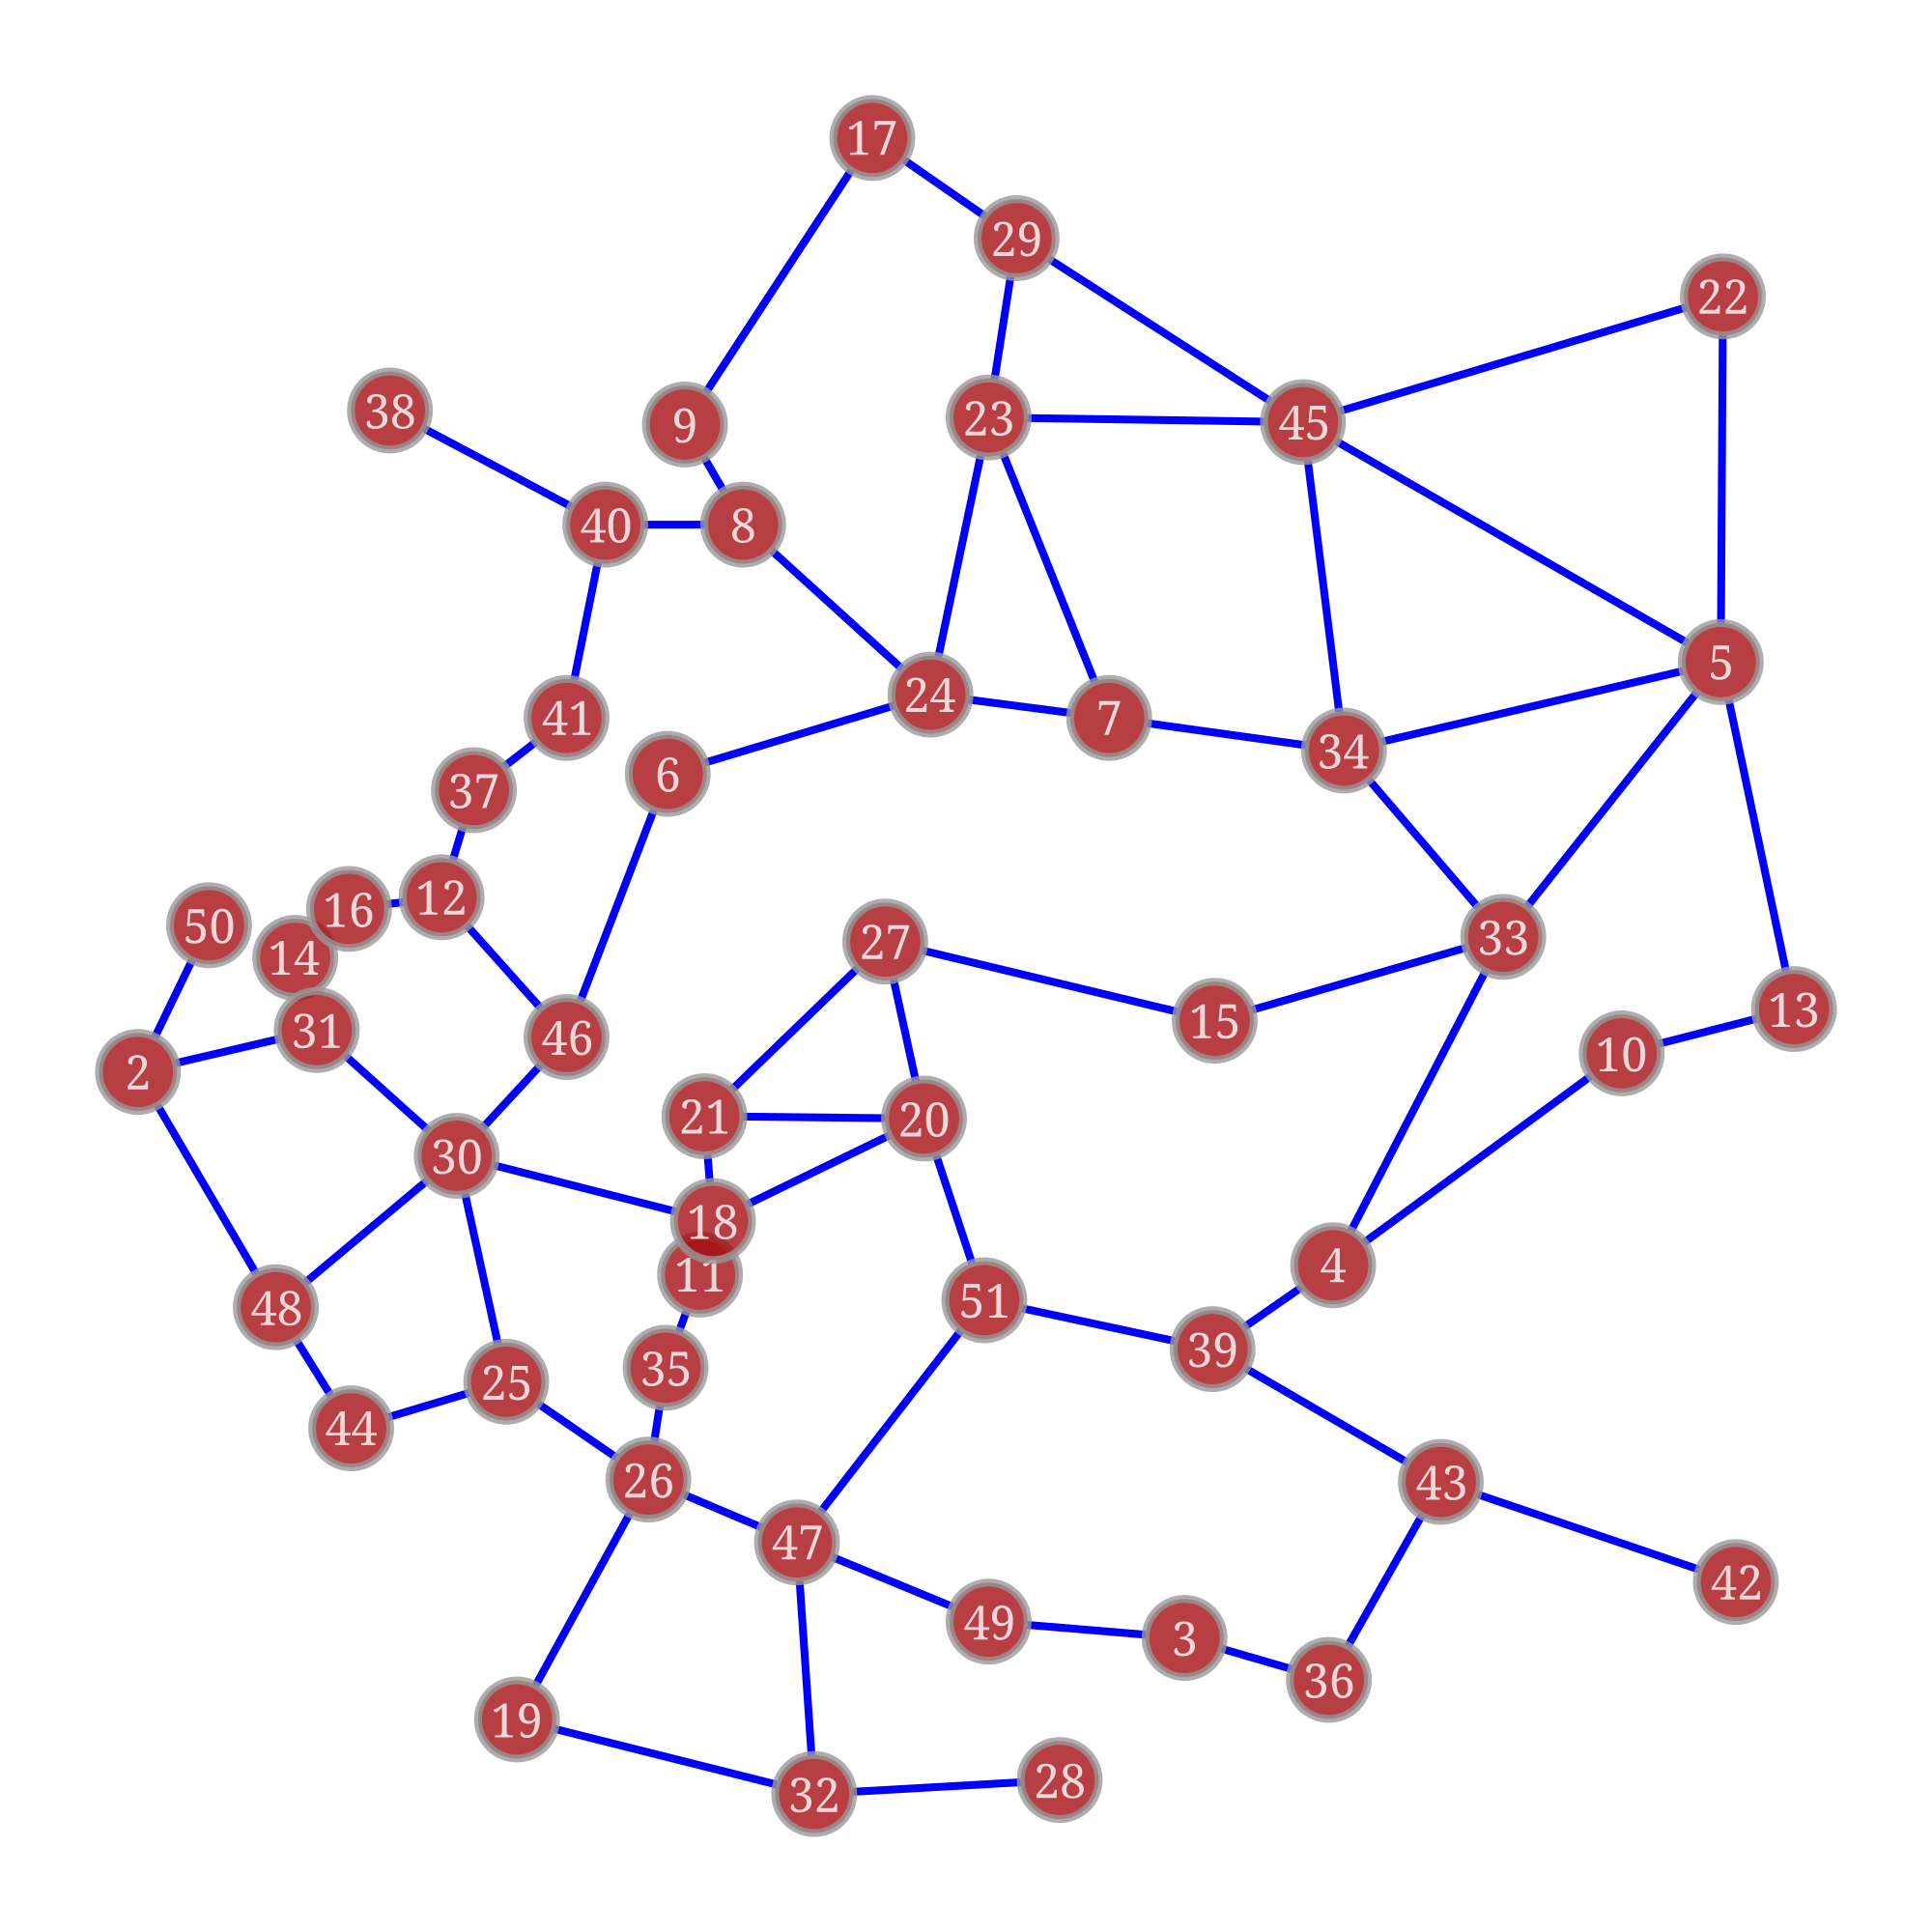

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7d5159d0d0, at 0x7f7d515652e0>

In [25]:
# Pure point graph
from graph_tool import draw
import python_codes.files_operators

filename1 = "Germany50"

read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())
#read_graph.clear_edges()
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000), output=f'./output/{filename1}.pdf')

nodes:  50 links  69


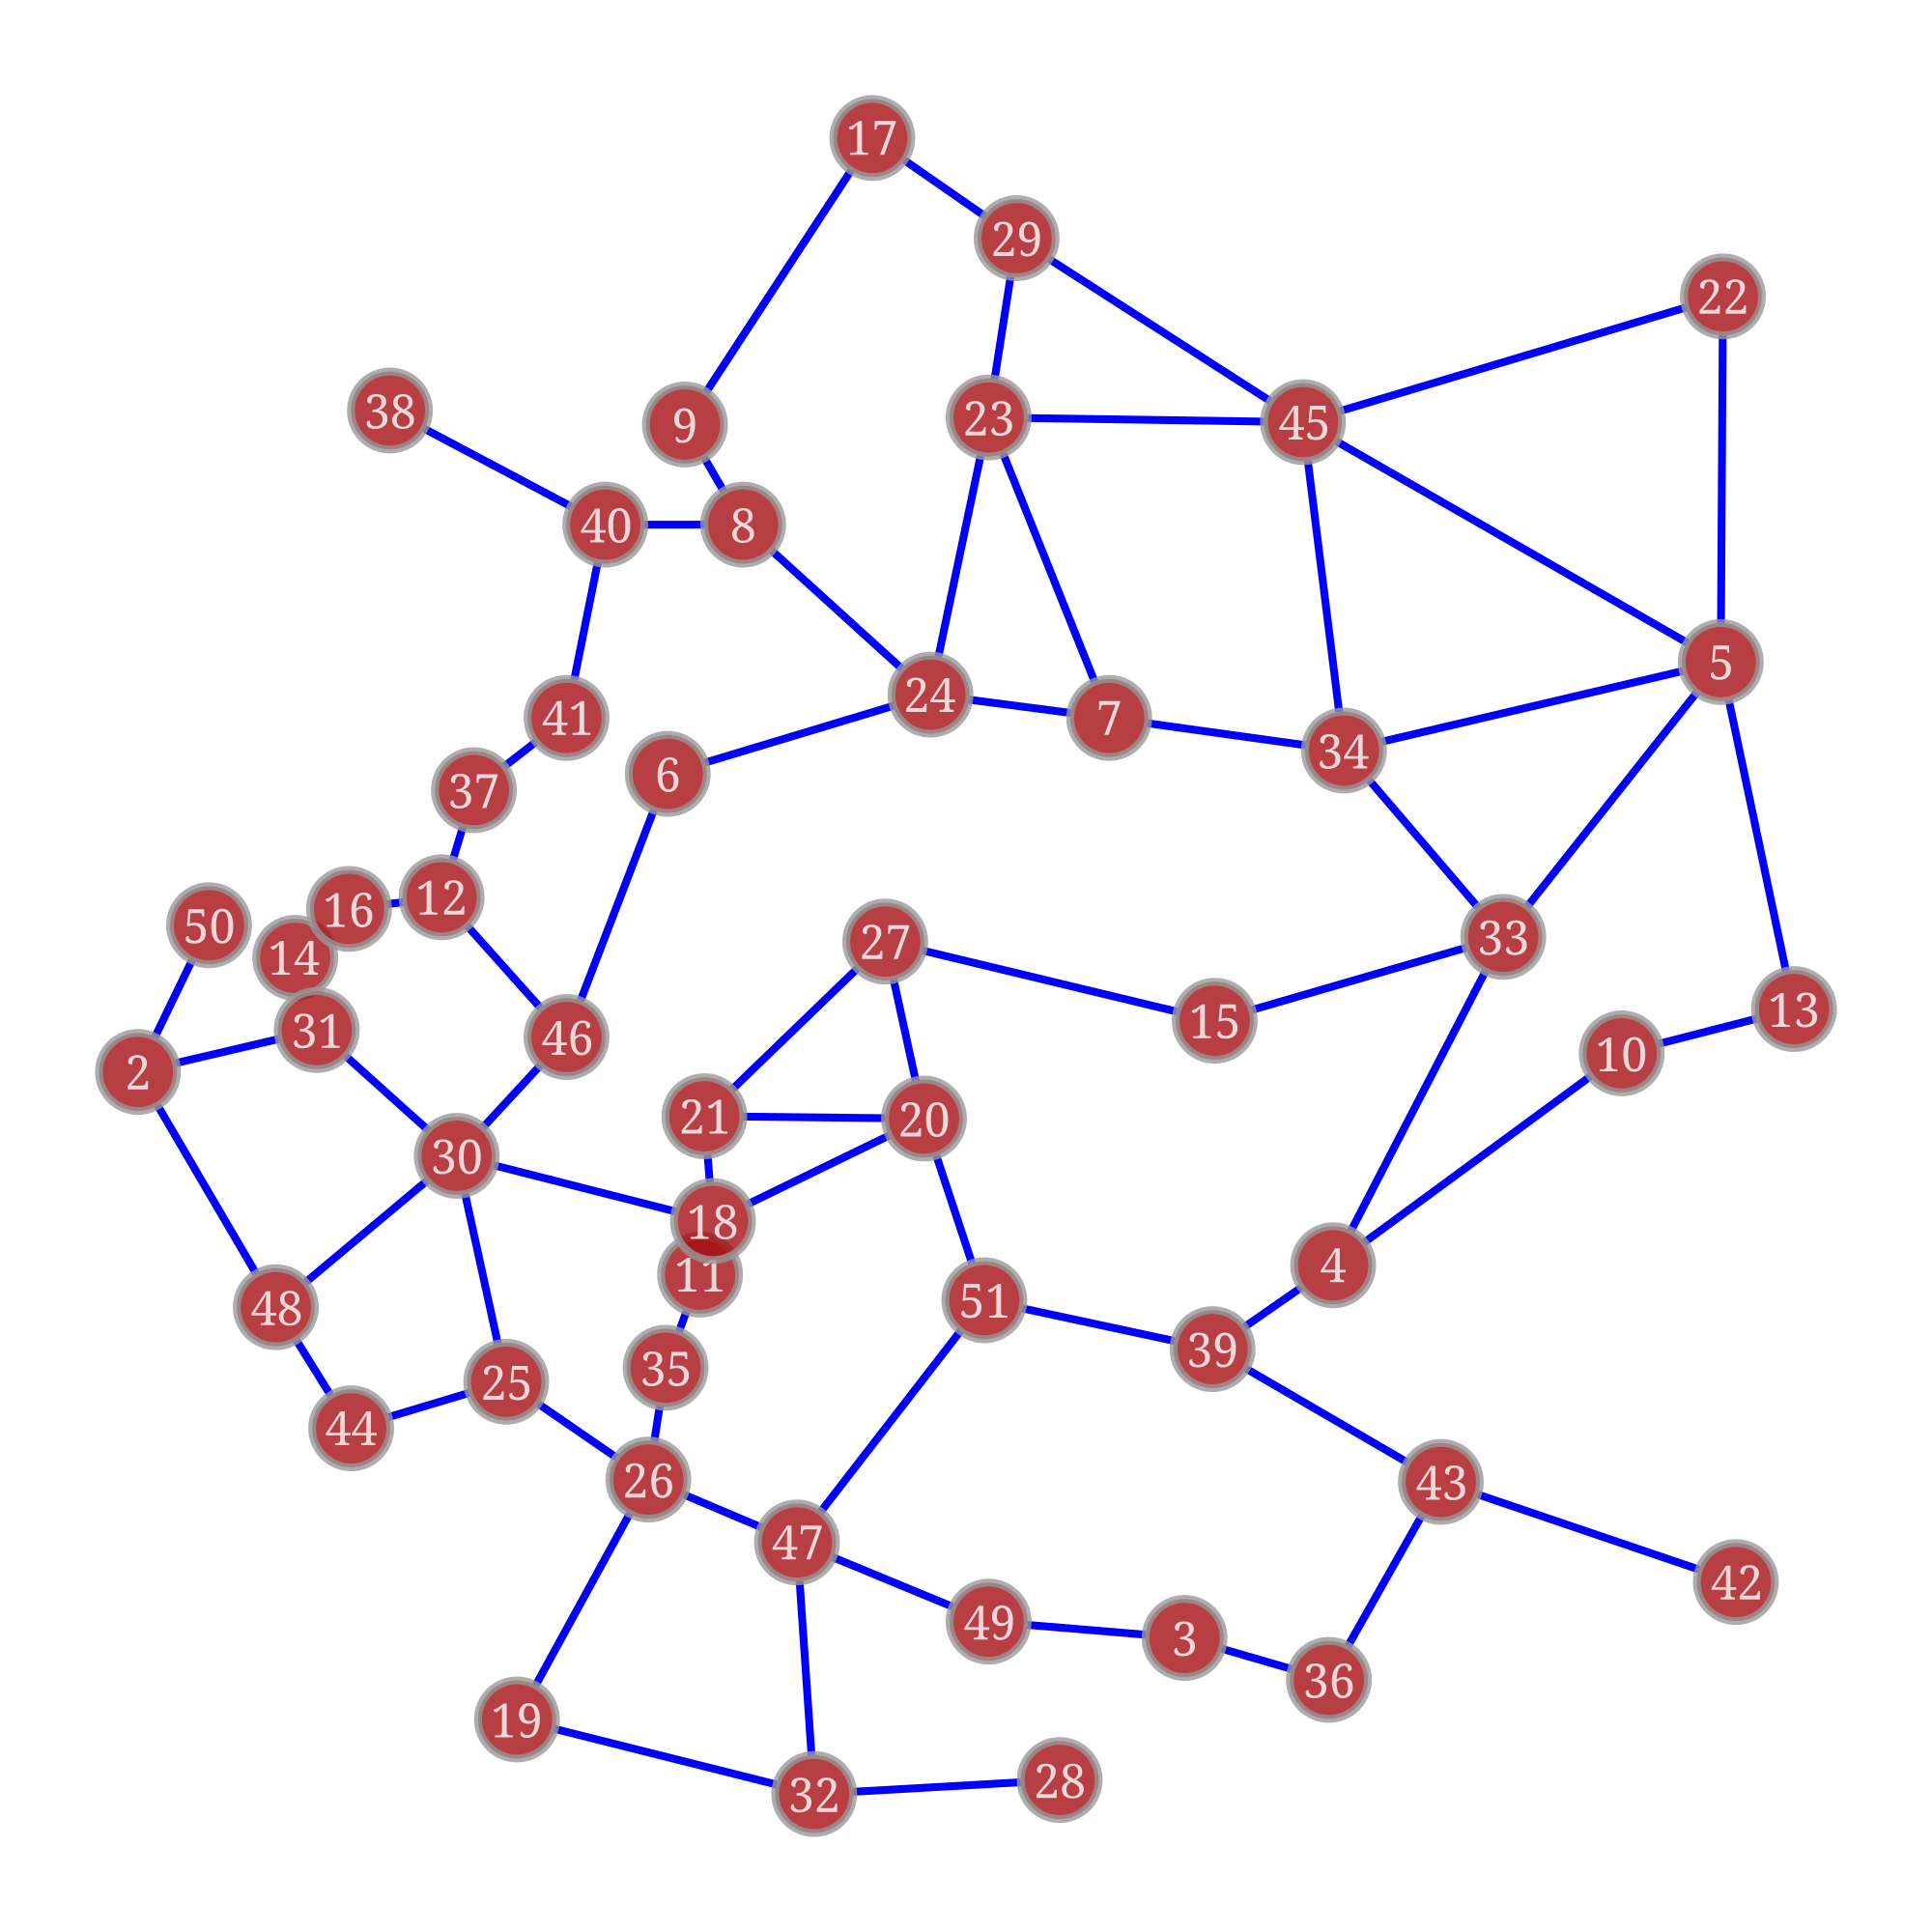

Shortest paths have been saved to ./output/Germany50_shortest_paths.csv
Overall Total Distance: 5996
Overall Average Distance: 4.8946938775510205


In [3]:
from graph_tool import draw
import python_codes.files_operators
from graph_tool.all import shortest_distance
import csv

# 读取网络图像
filename1 = "Germany50"
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())

# 绘制网络图像
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000), output=f'./output/{filename1}.pdf')

# 获取节点的显示序号
vertex_numbers = read_graph.vertex_properties["number"]

# 创建顶点序号列表
node_indices = [int(vertex_numbers[v]) for v in read_graph.vertices()]

# 计算所有节点对之间的最短路径
nodes = list(read_graph.vertices())
distances = {}
total_distance_sum = 0
num_pairs = 0

for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):  # 确保每对节点只计算一次
        distance = shortest_distance(read_graph, source=nodes[i], target=nodes[j])
        distances[(node_indices[i], node_indices[j])] = distance
        distances[(node_indices[j], node_indices[i])] = distance  # because the graph is undirected
        total_distance_sum += distance
        num_pairs += 1

# 计算整个网络的平均距离
overall_average_distance = total_distance_sum / num_pairs if num_pairs > 0 else 0

# 保存距离矩阵到CSV文件
with open(f"./output/{filename1}_shortest_paths.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    # 写入表头
    header = ["Node"] + [str(node) for node in node_indices] + ["Total Distance", "Average Distance"]
    writer.writerow(header)
    
    # 写入每个节点的距离
    for i in range(len(nodes)):
        row = [str(node_indices[i])] + [distances[(node_indices[i], node_indices[j])] if node_indices[i] != node_indices[j] else 0 for j in range(len(nodes))]
        total_distance = sum(distances[(node_indices[i], node_indices[j])] for j in range(len(nodes)) if node_indices[i] != node_indices[j])
        average_distance = total_distance / (len(nodes) - 1) if len(nodes) > 1 else 0
        row += [total_distance, average_distance]
        writer.writerow(row)

    # 写入整体网络的总距离和平均距离
    writer.writerow([])
    writer.writerow(["Overall Total Distance", total_distance_sum])
    writer.writerow(["Overall Average Distance", overall_average_distance])

print(f"Shortest paths have been saved to ./output/{filename1}_shortest_paths.csv")
print(f"Overall Total Distance: {total_distance_sum}")
print(f"Overall Average Distance: {overall_average_distance}")


nodes:  37 links  46


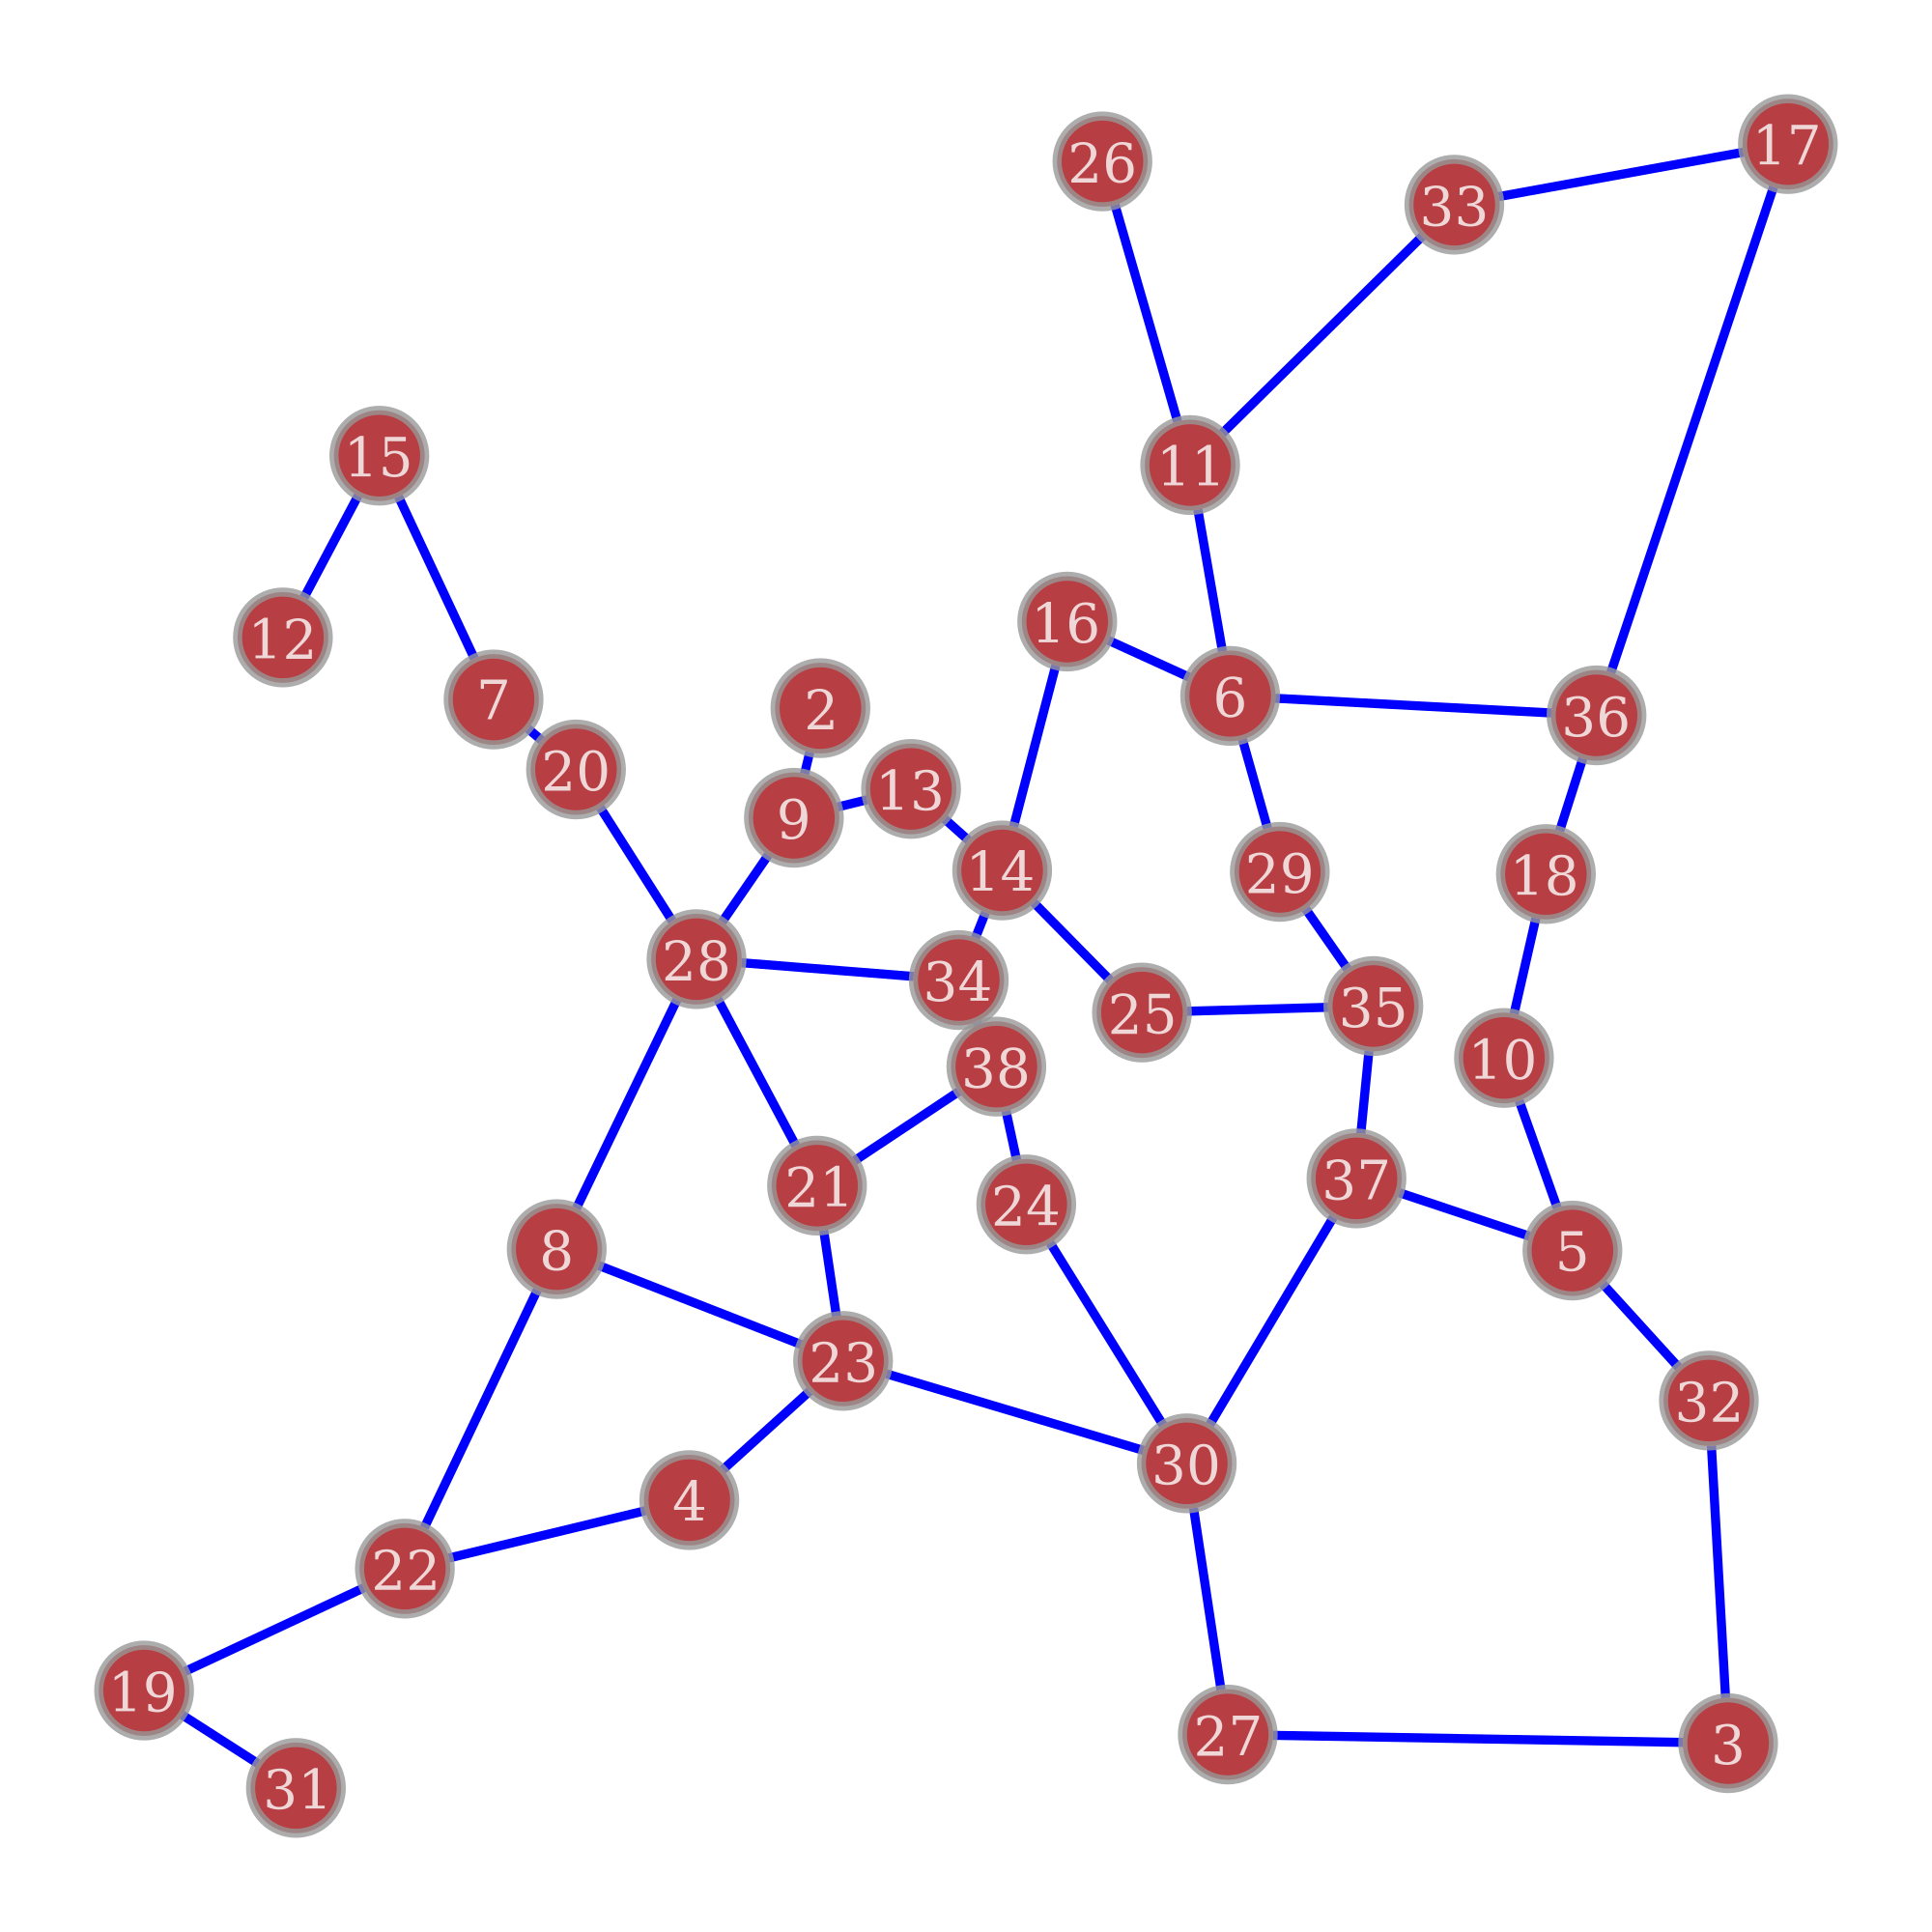

Shortest paths have been saved to ./output/cost266_shortest_paths.csv
Overall Total Distance: 3018
Overall Average Distance: 4.531531531531532


In [2]:
from graph_tool import draw
import python_codes.files_operators
from graph_tool.all import shortest_distance
import csv

# 读取网络图像
filename1 = "cost266"
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())

# 绘制网络图像
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000), output=f'./output/{filename1}.pdf')

# 获取节点的显示序号
vertex_numbers = read_graph.vertex_properties["number"]

# 创建顶点序号列表
node_indices = [int(vertex_numbers[v]) for v in read_graph.vertices()]

# 计算所有节点对之间的最短路径
nodes = list(read_graph.vertices())
distances = {}
total_distance_sum = 0
num_pairs = 0

for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):  # 确保每对节点只计算一次
        distance = shortest_distance(read_graph, source=nodes[i], target=nodes[j])
        distances[(node_indices[i], node_indices[j])] = distance
        distances[(node_indices[j], node_indices[i])] = distance  # because the graph is undirected
        total_distance_sum += distance
        num_pairs += 1

# 计算整个网络的平均距离
overall_average_distance = total_distance_sum / num_pairs if num_pairs > 0 else 0

# 保存距离矩阵到CSV文件
with open(f"./output/{filename1}_shortest_paths.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    # 写入表头
    header = ["Node"] + [str(node) for node in node_indices] + ["Total Distance", "Average Distance"]
    writer.writerow(header)
    
    # 写入每个节点的距离
    for i in range(len(nodes)):
        row = [str(node_indices[i])] + [distances[(node_indices[i], node_indices[j])] if node_indices[i] != node_indices[j] else 0 for j in range(len(nodes))]
        total_distance = sum(distances[(node_indices[i], node_indices[j])] for j in range(len(nodes)) if node_indices[i] != node_indices[j])
        average_distance = total_distance / (len(nodes) - 1) if len(nodes) > 1 else 0
        row += [total_distance, average_distance]
        writer.writerow(row)

    # 写入整体网络的总距离和平均距离
    writer.writerow([])
    writer.writerow(["Overall Total Distance", total_distance_sum])
    writer.writerow(["Overall Average Distance", overall_average_distance])

print(f"Shortest paths have been saved to ./output/{filename1}_shortest_paths.csv")
print(f"Overall Total Distance: {total_distance_sum}")
print(f"Overall Average Distance: {overall_average_distance}")

In [4]:
# Pure point graph
from graph_tool import draw, Graph
from graph_tool.topology import min_spanning_tree
import python_codes.files_operators

filename1 = "Germany50"

# 读取网络数据
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())

# 计算最小生成树，不指定权重
mst = min_spanning_tree(read_graph)

# 创建一个新图用于存储最小生成树
mst_graph = Graph(directed=False)
mst_graph.add_vertex(read_graph.num_vertices())

# 添加最小生成树的边
for edge, in_mst in zip(read_graph.edges(), mst):
    if in_mst:
        mst_graph.add_edge(edge.source(), edge.target())

# 复制节点属性
for prop_name, prop in read_graph.vertex_properties.items():
    mst_graph.vertex_properties[prop_name] = mst_graph.new_vertex_property(prop.value_type())
    for v in mst_graph.vertices():
        mst_graph.vertex_properties[prop_name][v] = prop[v]

# 绘制最小生成树
draw.graph_draw(mst_graph, read_pos, vertex_text=mst_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000), output=f'./output_GA/{filename1}_mst.pdf')
print("MST nodes: ", mst_graph.num_vertices(), "MST links: ", mst_graph.num_edges())

nodes:  50 links  69
MST nodes:  50 MST links:  49
